LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


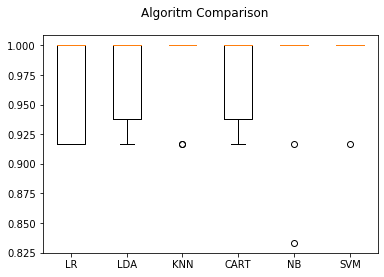

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [18]:
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Load libraries
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Load dataset
url= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names= ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset= pandas.read_csv(url, names=names)

#how many rows and columns data set has
print(dataset.shape)

#look at data
print(dataset.head(20))

#statistical summary of the data
print(dataset.describe())

#class distribution- see the number of rows that belong to each class
print(dataset.groupby('class').size())

#box and whisker plots
dataset.plot(kind='box', subplots= True, layout=(2,2), sharex= False, sharey= False)
plt.show()

#histograms
dataset.hist()
plt.show()

#scatter plot matrix
scatter_matrix(dataset)
plt.show()
#there is a linear relationship, showing a high correlation and a predictable relationship

#split data- 80% to train, 20% to test
array= dataset.values
X= array[:,0:4] #slicing array data[from:to]
Y= array[:,4]
validation_size=0.20
seed = 7
X_train, X_validation, Y_train, Y_validation=model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)


# Test options- splits dataset into 10 parts, trains on 9 and tests on 1
seed=7 #random number generator , use random number generator so data set isn't too small and ML works for only certain situations
scoring='accuracy'

#Build and evaluate Models- comparing different models 
#models.append(short nickname, actual name)
models =[] 
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model in turn with 10=fold cross validation procedure, have same random seed to make sure that the same splits to the training data are performed and each algorithm is evaluated in the same way
results = []
names =[]
for name, model in models:
    kfold= model_selection.KFold(n_splits=10, random_state=seed)
    cv_results= model_selection.cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
# result of this= Nickname: mean accuracy (standard deviation accuracy)

#compare algorithms with a boxplot
fig = plt.figure()
fig.suptitle('Algoritm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Make predictions on validation dataset- run the KNN model directly on the validation set and summarize the results as a final accuracy score- a confusion matrix and a classification report
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))